In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   -- ------------------------------------- 19.4/332.0 MB 97.1 MB/s eta 0:00:04
   --- ------------------------------------ 32.2/332.0 MB 78.2 MB/s eta 0:00:04
   ------ --------------------------------- 50.6/332.0 MB 81.3 MB/s eta 0:00:04
   -------- ------------------------------- 69.2/332.0 MB 83.2 MB/s eta 0:00:04
   ---------- ----------------------------- 87.0/332.0 MB 85.9 MB/s eta 0:00:03
   ----------- ---------------------------- 95.4/332.0 MB 75.9 MB/s eta 0:00:04
   ----------- ---------------------------- 96.7/332.0 MB 70.3 MB/s eta 0:00:04
   ------------ -------------------------- 108.5/332.0 MB 64.7 MB/s eta 0:00:04
   --------------- ----------------------- 128.7/332.0 MB 68.1 MB/s eta 0:00:03
   ----------------- --------------------- 149.4/332.0 MB 71.2 MB/s eta 0:00:03
   ------------------- ------------------- 170.1/332.0 MB 73.6 MB/s eta 0:00:03
   --------------------- ----------------- 186.9/

In [1]:
!pip install split-folders

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
import pandas as pd

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
train_card_dir = './Image_data/cardboard'
train_glass_dir = './Image_data/glass'
train_metal_dir = './Image_data/metal'
train_paper_dir = './Image_data/paper'
train_plast_dir = './Image_data/plastic'
train_trash_dir = './Image_data/trash'

In [3]:
train_card_names = os.listdir(train_card_dir)
train_glass_names = os.listdir(train_glass_dir)
train_metal_names = os.listdir(train_metal_dir)
train_paper_names = os.listdir(train_paper_dir)
train_plast_names = os.listdir(train_plast_dir)
train_trash_names = os.listdir(train_trash_dir)

In [4]:
card_files = [train_card_dir + '/' + f for f in train_card_names]
glass_files = [train_glass_dir + '/' + f for f in train_glass_names]
metal_files = [train_metal_dir + '/' + f for f in train_metal_names]
paper_files = [train_paper_dir + '/' + f for f in train_paper_names]
plast_files = [train_plast_dir + '/' + f for f in train_plast_names]
trash_files = [train_trash_dir + '/' + f for f in train_trash_names]

In [19]:
# card_files

In [6]:
print('cardboard:', len(train_card_names))
print('glass:', len(train_glass_names))
print('metal:', len(train_metal_names))
print('paper:', len(train_paper_names))
print('plastic:', len(train_plast_names))
print('trash:', len(train_trash_names))

cardboard: 403
glass: 501
metal: 410
paper: 594
plastic: 482
trash: 137


In [7]:
# 모델 설계하기
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(512,384,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 510, 382, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 191, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 253, 189, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 94, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 92, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 62, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 182528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │       1,095,174 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,118,758 (4.27 MB)

 Trainable params: 1,118,758 (4.27 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [31]:
# 이미지 값을 0~1 사이로 제한
train_datagen = ImageDataGenerator(
        rescale=1/255,
        validation_split=0.2
)

In [10]:
# Train set
train_generator = train_datagen.flow_from_directory(
    './Image_data/',
    target_size=(512,384), # 해상도 조절
    batch_size=128, # 배치 크기
    class_mode='categorical', #분류 방법
    subset='training'
)

Found 2024 images belonging to 6 classes.


In [11]:
train_generator

In [12]:
# valid set
valid_generator = train_datagen.flow_from_directory(
    './Image_data/',
    target_size=(512,384),
    batch_size=128,
    class_mode='categorical',
    subset='validation'
)

Found 503 images belonging to 6 classes.


In [13]:
# 모델 학습
history = model.fit(
    train_generator,
    epochs=15,
    verbose=1
)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.2297 - loss: 0.6240 
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.3310 - loss: 0.4151  
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.4817 - loss: 0.3614
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5198 - loss: 0.3358
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.6008 - loss: 0.3050
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6655 - loss: 0.2737
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.6966 - loss: 0.2436
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7871 - loss: 0.2022
Epoch 9/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8271 - loss: 0.1699
Epoch 10/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8735 - loss: 0.1364
Epoch 11/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9205 - loss: 0.1042
Epoch 12/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.9249 -

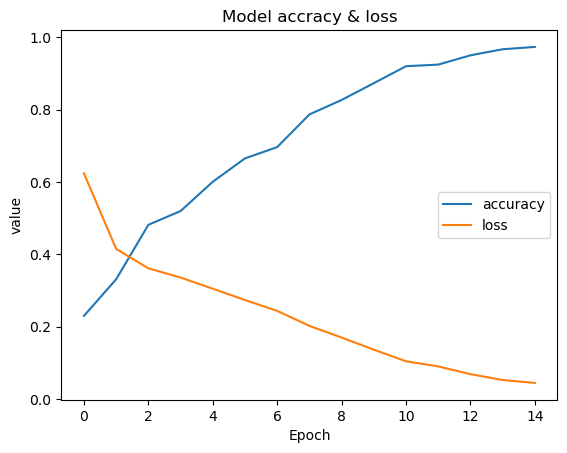

In [14]:
# 모델 평가
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accracy & loss')
plt.xlabel('Epoch')
plt.ylabel('value')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [15]:
# 모델 검증
results = model.evaluate(valid_generator)
print("test loss, test acc:", results)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4652 - loss: 0.6656
test loss, test acc: [0.6656432747840881, 0.4652087390422821]


In [20]:
dlist = './Image_data_test/'

In [21]:
predict_list = os.listdir(dlist)

In [22]:
print(predict_list)

['plastic.jpg']


In [23]:
img = [cv2.imread(dlist + i ) for i in predict_list]
img = [cv2.resize(i, (512,384)) for i in img]
img = np.array(img)
img = img.astype('float') / 255.0

In [28]:
# 분류
cutoff = .5
predictions = model.predict(img)
print(predictions >= cutoff)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[False False False  True False False]]
